In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import gmaps
import requests
import scipy.stats as stats
#from api_key import api_key

In [2]:
csv_read = pd.read_csv("../cleaned_2018_texas_accidents.csv")
texas_accidents_df = pd.DataFrame(csv_read)
texas_accidents_df.head()

,Unnamed: 0,Time,Latitude,Longitude,City,County,State,Zipcode,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,Year,Month,Day
0,195997,2018-11-30 04:04:00,29.354069,-98.400734,San Antonio,Bexar,TX,78222,66.9,90.0,29.79,8.0,4.6,0.0,Overcast,2018,11,30
1,195998,2018-11-30 04:03:22,29.452906,-98.501022,San Antonio,Bexar,TX,78212-3329,64.9,97.0,29.79,3.0,6.9,0.0,Overcast,2018,11,30
2,196000,2018-11-30 04:03:04,29.483614,-98.403198,San Antonio,Bexar,TX,78218,64.9,97.0,29.79,3.0,6.9,0.0,Overcast,2018,11,30
3,196019,2018-11-30 11:03:46,29.494801,-98.535782,San Antonio,Bexar,TX,78213-3947,68.0,87.0,29.79,10.0,8.1,0.0,Light Drizzle,2018,11,30
4,196021,2018-11-30 11:15:14,29.493256,-98.499268,San Antonio,Bexar,TX,78216-7205,68.0,87.0,29.79,10.0,8.1,0.0,Light Drizzle,2018,11,30


In [3]:
# san antonio accident data
sa_df = texas_accidents_df.loc[texas_accidents_df['City']=='San Antonio']
sa_weather1 = sa_df.groupby('Weather_Condition')
sa_weather = sa_weather1['Time'].count()
sa_weather

Weather_Condition
Clear                            17
Fog                               5
Haze                              1
Heavy Rain                       30
Heavy Thunderstorms and Rain     15
Light Drizzle                    65
Light Freezing Rain               9
Light Rain                      379
Light Snow                        3
Light Thunderstorms and Rain     23
Mostly Cloudy                    41
Overcast                        200
Partly Cloudy                     6
Rain                             36
Scattered Clouds                 10
Thunderstorm                      3
Thunderstorms and Rain           11
Name: Time, dtype: int64

In [4]:
x_axis = sa_weather.index.to_list
x_axis

<bound method IndexOpsMixin.tolist of Index(['Clear', 'Fog', 'Haze', 'Heavy Rain', 'Heavy Thunderstorms and Rain',
       'Light Drizzle', 'Light Freezing Rain', 'Light Rain', 'Light Snow',
       'Light Thunderstorms and Rain', 'Mostly Cloudy', 'Overcast',
       'Partly Cloudy', 'Rain', 'Scattered Clouds', 'Thunderstorm',
       'Thunderstorms and Rain'],
      dtype='object', name='Weather_Condition')>

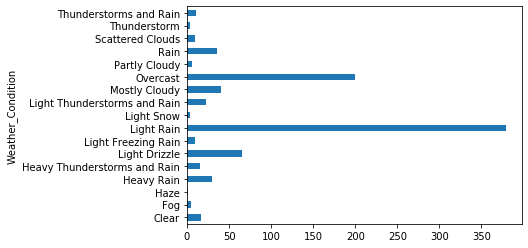

In [5]:
sa_weather.plot.barh(x=x_axis)

In [6]:
sa_visibility = sa_df.groupby('Visibility(mi)')
sa_visibility = sa_visibility['Time'].count()
sa_visibility


Visibility(mi)
0.1      17
0.2       8
0.4       1
0.5       7
0.8      12
0.9       1
1.0      21
1.2       1
1.5       8
1.8      11
2.0      51
2.5      11
3.0      53
4.0      50
5.0      44
6.0      40
7.0      44
8.0      41
9.0      24
10.0    409
Name: Time, dtype: int64

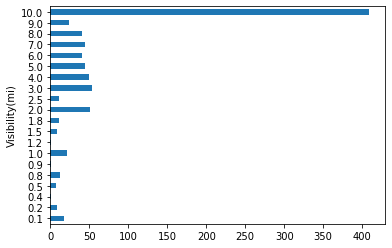

In [7]:
x_axis2 = sa_visibility.index.to_list
x_axis2
sa_visibility.plot.barh(x=x_axis2)

In [8]:
sa_precipitation = sa_df.groupby('Precipitation(in)')
sa_precipitation = sa_precipitation['Time'].count()


In [9]:
sa_temp = sa_df.groupby('Temperature(F)')
temp_count = sa_temp['Time'].count()
print(temp_count)
print(sa_df['Temperature(F)'].max())

Temperature(F)
26.1     3
27.0    10
27.9     1
28.0     2
28.2     2
        ..
91.0     4
91.8     2
93.9     3
96.1     1
98.1     1
Name: Time, Length: 135, dtype: int64
98.1


In [10]:
count = len(temp_count)
count

135

In [11]:
temp_count


Temperature(F)
26.1     3
27.0    10
27.9     1
28.0     2
28.2     2
        ..
91.0     4
91.8     2
93.9     3
96.1     1
98.1     1
Name: Time, Length: 135, dtype: int64

In [12]:
x_axis3 = temp_count.index.to_list
x_axis3


<bound method IndexOpsMixin.tolist of Float64Index([26.1, 27.0, 27.9, 28.0, 28.2, 28.9, 29.7, 30.0, 30.9, 41.0,
              ...
              86.9, 88.7, 88.9, 89.1, 90.3, 91.0, 91.8, 93.9, 96.1, 98.1],
             dtype='float64', name='Temperature(F)', length=135)>

In [13]:
bins = [0,10,20,30,40,50,60,70,80,90,100]
labels = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100']
temperatures = sa_df['Temperature(F)']
sa_df['Bins'] = pd.cut(temperatures, bins=bins, labels=labels)
sa_df

/Users/monicabustillos/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Unnamed: 0,Time,Latitude,Longitude,City,County,State,Zipcode,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,Year,Month,Day,Bins
0,195997,2018-11-30 04:04:00,29.354069,-98.400734,San Antonio,Bexar,TX,78222,66.9,90.0,29.79,8.0,4.6,0.0,Overcast,2018,11,30,61-70
1,195998,2018-11-30 04:03:22,29.452906,-98.501022,San Antonio,Bexar,TX,78212-3329,64.9,97.0,29.79,3.0,6.9,0.0,Overcast,2018,11,30,61-70
2,196000,2018-11-30 04:03:04,29.483614,-98.403198,San Antonio,Bexar,TX,78218,64.9,97.0,29.79,3.0,6.9,0.0,Overcast,2018,11,30,61-70
3,196019,2018-11-30 11:03:46,29.494801,-98.535782,San Antonio,Bexar,TX,78213-3947,68.0,87.0,29.79,10.0,8.1,0.0,Light Drizzle,2018,11,30,61-70
4,196021,2018-11-30 11:15:14,29.493256,-98.499268,San Antonio,Bexar,TX,78216-7205,68.0,87.0,29.79,10.0,8.1,0.0,Light Drizzle,2018,11,30,61-70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6937,367351,2018-02-21 17:17:03,29.514950,-98.553270,San Antonio,Bexar,TX,78230,44.1,85.0,30.11,10.0,17.3,0.0,Overcast,2018,2,21,41-50
6988,367832,2018-01-10 06:13:06,29.509690,-98.540040,San Antonio,Bexar,TX,78230-5136,48.0,93.0,29.97,1.0,4.6,0.0,Light Drizzle,2018,1,10,41-50
6998,368024,2018-01-16 08:25:53,29.439430,-98.444350,San Antonio,Bexar,TX,78208,27.0,72.0,30.63,10.0,15.0,0.0,Overcast,2018,1,16,21-30
7002,368036,2018-01-16 13:35:36,29.393170,-98.511350,San Antonio,Bexar,TX,78204,30.0,59.0,30.68,10.0,11.5,0.0,Overcast,2018,1,16,21-30


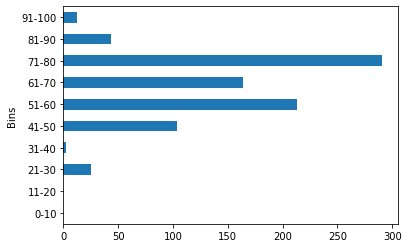

In [14]:
temp_group = sa_df.groupby(['Bins'])
temp_group = temp_group['Time'].count()
temp_group.plot.barh()


In [15]:
sa_df

,Unnamed: 0,Time,Latitude,Longitude,City,County,State,Zipcode,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,Year,Month,Day,Bins
0,195997,2018-11-30 04:04:00,29.354069,-98.400734,San Antonio,Bexar,TX,78222,66.9,90.0,29.79,8.0,4.6,0.0,Overcast,2018,11,30,61-70
1,195998,2018-11-30 04:03:22,29.452906,-98.501022,San Antonio,Bexar,TX,78212-3329,64.9,97.0,29.79,3.0,6.9,0.0,Overcast,2018,11,30,61-70
2,196000,2018-11-30 04:03:04,29.483614,-98.403198,San Antonio,Bexar,TX,78218,64.9,97.0,29.79,3.0,6.9,0.0,Overcast,2018,11,30,61-70
3,196019,2018-11-30 11:03:46,29.494801,-98.535782,San Antonio,Bexar,TX,78213-3947,68.0,87.0,29.79,10.0,8.1,0.0,Light Drizzle,2018,11,30,61-70
4,196021,2018-11-30 11:15:14,29.493256,-98.499268,San Antonio,Bexar,TX,78216-7205,68.0,87.0,29.79,10.0,8.1,0.0,Light Drizzle,2018,11,30,61-70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6937,367351,2018-02-21 17:17:03,29.514950,-98.553270,San Antonio,Bexar,TX,78230,44.1,85.0,30.11,10.0,17.3,0.0,Overcast,2018,2,21,41-50
6988,367832,2018-01-10 06:13:06,29.509690,-98.540040,San Antonio,Bexar,TX,78230-5136,48.0,93.0,29.97,1.0,4.6,0.0,Light Drizzle,2018,1,10,41-50
6998,368024,2018-01-16 08:25:53,29.439430,-98.444350,San Antonio,Bexar,TX,78208,27.0,72.0,30.63,10.0,15.0,0.0,Overcast,2018,1,16,21-30
7002,368036,2018-01-16 13:35:36,29.393170,-98.511350,San Antonio,Bexar,TX,78204,30.0,59.0,30.68,10.0,11.5,0.0,Overcast,2018,1,16,21-30


In [16]:
data =sa_weather1['Time'].count()

In [17]:
type(data)

pandas.core.series.Series

In [18]:
weather_conditions = pd.DataFrame({
    'Observed':data,
    'Expected': 0
})
weather_conditions

,Observed,Expected
Weather_Condition,,
Clear,17,0
Fog,5,0
Haze,1,0
Heavy Rain,30,0
Heavy Thunderstorms and Rain,15,0
Light Drizzle,65,0
Light Freezing Rain,9,0
Light Rain,379,0
Light Snow,3,0


In [19]:
critical_value = stats.chi2.ppf(q = 0.95, df = 16)

In [20]:
critical_value

26.29622760486423

In [24]:
stats.chisquare(weather_conditions['Observed'], weather_conditions['Expected'])

Power_divergenceResult(statistic=inf, pvalue=0.0)